In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df=pd.read_csv('complaints.csv')

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/23/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,My credit report has incorrect information and...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,14616,None,Consent provided,Web,08/23/22,Closed with non-monetary relief,Yes,NaN,5909611
1,08/22/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,In reference to the Fair Credit Reporting Act ...,None,"EQUIFAX, INC.",DC,20020,None,Consent provided,Web,08/22/22,Closed with explanation,Yes,NaN,5904114
2,11/23/22,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,On XX/XX/2022 I received a phone call from XXX...,Company believes it acted appropriately as aut...,"MRS BPO, LLC",NY,10075,Older American,Consent provided,Web,11/23/22,Closed with non-monetary relief,Yes,NaN,6232187
3,07/11/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,I reached out to XXXX to dispute information o...,None,"National Credit Systems,Inc.",AZ,85006,None,Consent provided,Web,07/11/22,Closed with explanation,Yes,NaN,5756379
4,08/14/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I found inaccurate and incorrect data on my cr...,None,"EQUIFAX, INC.",NC,28216,None,Consent provided,Web,08/14/22,Closed with explanation,Yes,NaN,5877801


In [4]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
df=df[df['Consumer complaint narrative'].notna()]

In [6]:
df.shape

(641595, 18)

In [7]:
df=df.rename(columns={'Consumer complaint narrative':'Consumer_complaint_narrative'})

In [8]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

<AxesSubplot:xlabel='Product'>

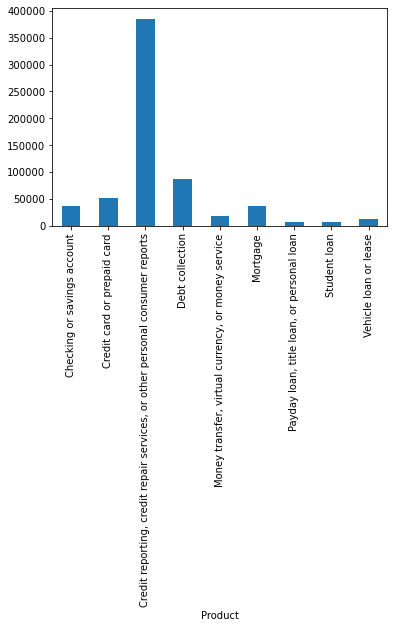

In [9]:
import matplotlib.pyplot as plt
fig=plt.figure()
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)

In [10]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    385193
Debt collection                                                                  86519
Credit card or prepaid card                                                      50810
Mortgage                                                                         36808
Checking or savings account                                                      36137
Money transfer, virtual currency, or money service                               19022
Vehicle loan or lease                                                            11918
Student loan                                                                      7901
Payday loan, title loan, or personal loan                                         7287
Name: Product, dtype: int64

In [11]:
credit_report=df[df['Product']=='Credit reporting, credit repair services, or other personal consumer reports']
prepaid_card=df[df['Product']=='Credit card or prepaid card']
debt_collection=df[df['Product']=='Debt collection']
vehicle_loan=df[df['Product']=='Vehicle loan or lease']
mortgage=df[df['Product']=='Mortgage']
payday_loan=df[df['Product']=='Payday loan, title loan, or personal loan']
money_transfer=df[df['Product']=='Money transfer, virtual currency, or money service']
student_loan=df[df['Product']=='Student loan']
savings_account=df[df['Product']=='Checking or savings account']

In [12]:
pip install textaugment

Note: you may need to restart the kernel to use updated packages.


In [13]:
from textaugment import EDA
t = EDA()
for i in range(0,6):
    ans = t.synonym_replacement("someone in north Carolina has stolen my identity information and has purchased items including XXXX cell phones thru XXXX on XXXX/XXXX/2015. A police report was filed as soon as I found out about it on XXXX/XXXX/2015. A investigation from XXXX is under way thru there fraud department and our local police department.",6)

    print("This is ans:",ans)
    print("--------------------")

This is ans: someone in north Carolina has stolen my identity information and has purchased items including XXXX cellphone phones thru XXXX on XXXX/XXXX/2015. antiophthalmic factor law cover was filed as soon as  found out about it on XXXX/XXXX/2015. antiophthalmic factor investigation from XXXX is under way thru there fraud department and our topical anesthetic law department.
--------------------
This is ans: soul in north Carolina has stolen my identity information and has purchased item including XXXX cell phones thru XXXX on XXXX/XXXX/2015. A police reputation was filed as presently as I incur out about it on XXXX/XXXX/2015. A investigation from XXXX is under direction thru there fraud department and our local police department.
--------------------
This is ans: someone in north Carolina has stolen my indistinguishability selective information and has purchase items including XXXX cell phones thru XXXX on XXXX/XXXX/2015. A police report was filed as soon as I institute out about i

In [19]:
credit_report=credit_report.sample(1000)
prepaid_card=prepaid_card.sample(1000)
debt_collection=debt_collection.sample(1000)
vehicle_loan=vehicle_loan.sample(1000)
mortgage=mortgage.sample(1000)
payday_loan=payday_loan.sample(1000)
money_transfer=money_transfer.sample(1000)
student_loan=student_loan.sample(1000)
savings_account=savings_account.sample(1000)

In [20]:
print(credit_report)

       Date received                                            Product  \
585807      08/16/22  Credit reporting, credit repair services, or o...   
27705       07/13/22  Credit reporting, credit repair services, or o...   
216567      05/24/20  Credit reporting, credit repair services, or o...   
480650      09/10/22  Credit reporting, credit repair services, or o...   
151993      06/25/20  Credit reporting, credit repair services, or o...   
...              ...                                                ...   
115872      05/15/20  Credit reporting, credit repair services, or o...   
443541      06/15/21  Credit reporting, credit repair services, or o...   
132587      07/27/20  Credit reporting, credit repair services, or o...   
175074      02/17/20  Credit reporting, credit repair services, or o...   
533268      05/29/22  Credit reporting, credit repair services, or o...   

             Sub-product                                              Issue  \
585807  Credit repor

In [21]:
credit_report = credit_report[['Consumer_complaint_narrative','Product']]
prepaid_card = prepaid_card[['Consumer_complaint_narrative','Product']]
debt_collection = debt_collection[['Consumer_complaint_narrative','Product']]
vehicle_loan = vehicle_loan[['Consumer_complaint_narrative','Product']]
mortgage = mortgage[['Consumer_complaint_narrative','Product']]
payday_loan = payday_loan[['Consumer_complaint_narrative','Product']]
money_transfer = money_transfer[['Consumer_complaint_narrative','Product']]
student_loan = student_loan[['Consumer_complaint_narrative','Product']]
savings_account = savings_account[['Consumer_complaint_narrative','Product']]

df=credit_report.append(prepaid_card,ignore_index=True)
df=df.append(debt_collection,ignore_index=True)
df=df.append(vehicle_loan,ignore_index=True)
df=df.append(mortgage,ignore_index=True)
df=df.append(payday_loan,ignore_index=True)
df=df.append(money_transfer,ignore_index=True)
df=df.append(student_loan,ignore_index=True)
df=df.append(savings_account,ignore_index=True)
print(df.shape)

(9000, 2)


In [1]:
print(vehicle_loan.shape)

d={"Consumer_complaint_narrative":[],"Product":[]}

from textaugment import EDA
t = EDA()

ud = pd.DataFrame(d)
for index,row in vehicle_loan.head(7000).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,1):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

vehicle_loan = ud
#print(vehicle_loan.shape)

ud = pd.DataFrame(d)
for index,row in payday_loan.head(5500).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,2):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

payday_loan = ud

ud = pd.DataFrame(d)
for index,row in money_transfer.head(6000).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,1):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

money_transfer = ud

ud = pd.DataFrame(d)
for index,row in student_loan.head(3000).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,1):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

student_loan = ud

NameError: name 'vehicle_loan' is not defined

In [23]:
df=df.append(vehicle_loan,ignore_index=True)
df=df.append(payday_loan,ignore_index=True)
df=df.append(money_transfer,ignore_index=True)
df=df.append(student_loan,ignore_index=True)

In [24]:
df.shape

(14000, 2)

In [25]:
df['Product'].value_counts()

Payday loan, title loan, or personal loan                                       3000
Vehicle loan or lease                                                           2000
Student loan                                                                    2000
Money transfer, virtual currency, or money service                              2000
Credit reporting, credit repair services, or other personal consumer reports    1000
Credit card or prepaid card                                                     1000
Checking or savings account                                                     1000
Mortgage                                                                        1000
Debt collection                                                                 1000
Name: Product, dtype: int64

In [26]:
#LowerCase Conversion
df['Consumer_complaint_narrative']=df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [27]:
df['Consumer_complaint_narrative'].sample(5)

4083     the closing documents for my mortgage state th...
11431    someone assailable an account in my describe f...
113      i have placed a fraud alert on my credit repor...
2928     in xxxx of 2021 i received a letter from south...
12781    on xx/xx/2020 after several attempts to pickup...
Name: Consumer_complaint_narrative, dtype: object

In [28]:
#Punctuations Removal
#Digits Removal
df['Consumer_complaint_narrative']=df['Consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")
df['Consumer_complaint_narrative']=df['Consumer_complaint_narrative'].str.replace(r'[\d]',"")

<ipython-input-28-c604da2eaeb4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Consumer_complaint_narrative']=df['Consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")
<ipython-input-28-c604da2eaeb4>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Consumer_complaint_narrative']=df['Consumer_complaint_narrative'].str.replace(r'[\d]',"")


In [29]:
#StopWords Removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [30]:
from nltk.stem import WordNetLemmatizer

In [31]:
lemmatizer=WordNetLemmatizer()

In [32]:
#Lemmatization
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x.split()]))

In [33]:
#Removing xxxx present in complaints
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].str.replace('x',"")

In [34]:
for index,row in df.iterrows():
    row['Consumer_complaint_narrative']=row['Consumer_complaint_narrative'].strip()

In [35]:
df.to_csv('cleaner.csv')

In [36]:
df['Consumer_complaint_narrative'].sample(5)

5287     submitted online application personal loan  mo...
13907    hello thought contact fedloan student loan qui...
2161     caci consumer adjustment debt collecting agenc...
10952    make refinance mortgage  also personal strain ...
13790    indiana  graduated     thought beautiful path ...
Name: Consumer_complaint_narrative, dtype: object

Credit reporting, credit repair services, or other personal consumer reports


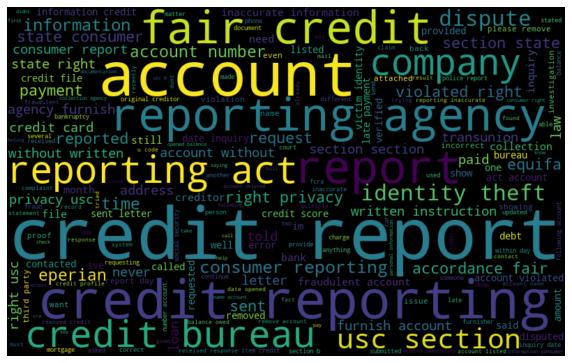

Credit card or prepaid card


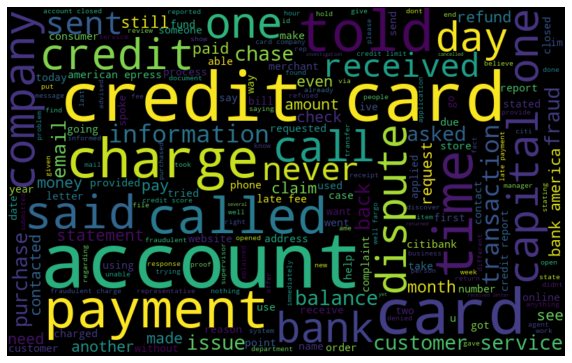

Debt collection


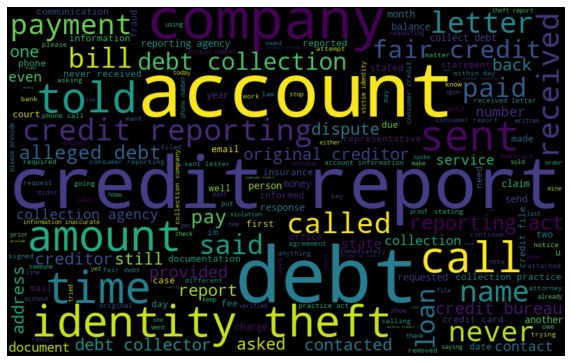

Vehicle loan or lease


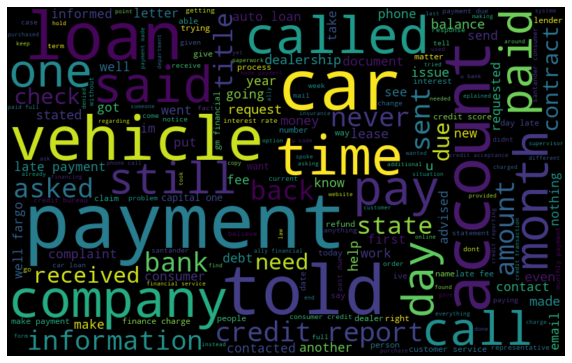

Mortgage


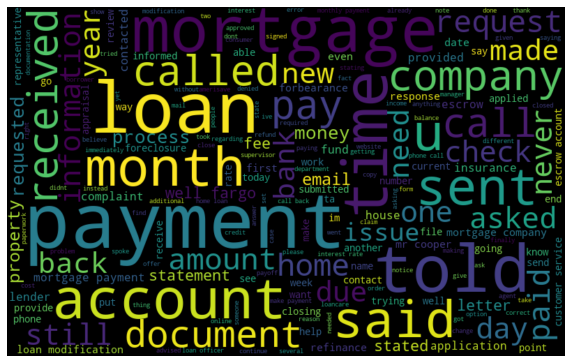

Payday loan, title loan, or personal loan


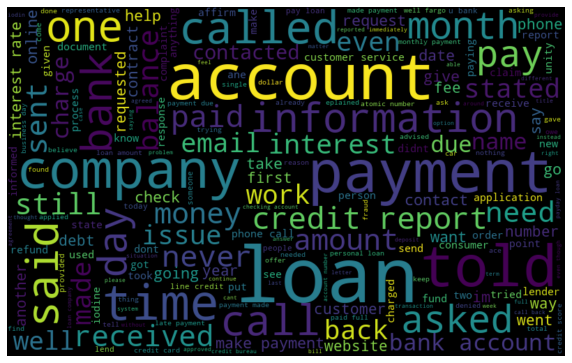

Money transfer, virtual currency, or money service


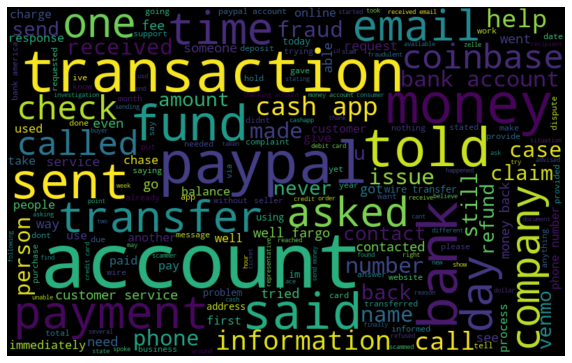

Student loan


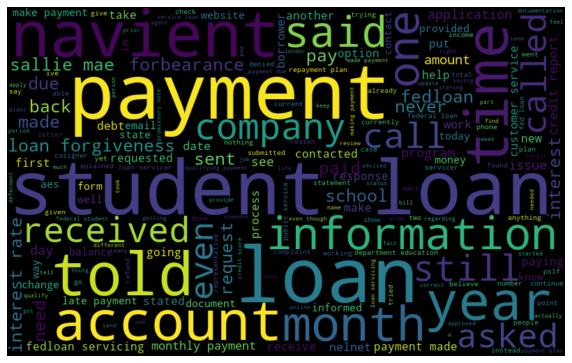

Checking or savings account


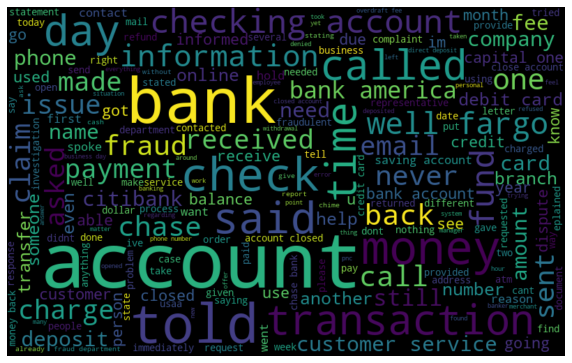

In [37]:
from wordcloud import WordCloud
for product_name in df['Product'].unique():
    print(product_name)
    all_words = ' '.join([text for text in df.loc[df['Product'].str.contains(product_name),'Consumer_complaint_narrative']])
    
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [39]:
X_train,X_test,y_train,y_test=train_test_split(df['Consumer_complaint_narrative'],df['Product'],test_size=0.3,random_state=68)

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
text=Pipeline([('tfidf',TfidfVectorizer()),('classifier',MultinomialNB())])

In [42]:
text.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [43]:
predictions=text.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
print(confusion_matrix(y_test,predictions))

[[  4   0   0   0 122   0 177   0   1]
 [  0   6   4   0  29   0 267   1   5]
 [  0   0 139   6   1   0 170   9   5]
 [  0   0  20  46   1   0 249   3  14]
 [  0   0   0   0 485   0  90   0   1]
 [  0   0   0   0   3  42 220  11   5]
 [  0   0   3   1   7   0 884   1  26]
 [  0   0   0   0   1   0 108 453  11]
 [  0   0   2   0   3   0 258   1 305]]


In [46]:
print(classification_report(y_test,predictions))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       1.00      0.01      0.03       304
                                                 Credit card or prepaid card       1.00      0.02      0.04       312
Credit reporting, credit repair services, or other personal consumer reports       0.83      0.42      0.56       330
                                                             Debt collection       0.87      0.14      0.24       333
                          Money transfer, virtual currency, or money service       0.74      0.84      0.79       576
                                                                    Mortgage       1.00      0.15      0.26       281
                                   Payday loan, title loan, or personal loan       0.36      0.96      0.53       922
                                                       

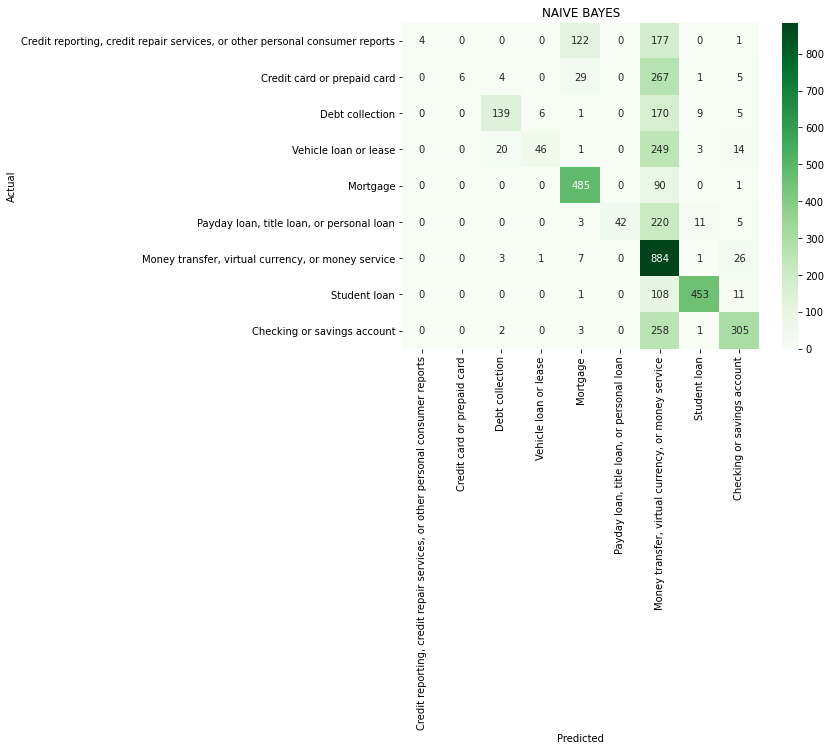

In [47]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('NAIVE BAYES')
plt.show()

In [48]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [49]:
metrics.accuracy_score(y_test,predictions)

0.5628571428571428

In [50]:
metrics.precision_score(y_test,predictions,average=None)

array([1.        , 1.        , 0.82738095, 0.86792453, 0.74386503,
       1.        , 0.36483698, 0.94572025, 0.81769437])

In [51]:
metrics.recall_score(y_test,predictions,average=None)

array([0.01315789, 0.01923077, 0.42121212, 0.13813814, 0.84201389,
       0.14946619, 0.95878525, 0.79057592, 0.53602812])

In [52]:
metrics.f1_score(y_test,predictions,average=None)

array([0.02597403, 0.03773585, 0.55823293, 0.23834197, 0.78990228,
       0.26006192, 0.52855007, 0.86121673, 0.64755839])

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
text_dectree=Pipeline([('tfidf',TfidfVectorizer()),('classifier',DecisionTreeClassifier())])

In [55]:
text_dectree.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

In [56]:
predictions_dectree=text_dectree.predict(X_test)

In [57]:
print(confusion_matrix(y_test,predictions_dectree))

[[128  40  10   4  69   6  33   6   8]
 [ 22 173  15   8  26   3  33  12  20]
 [  9  16 188  33   3   9  29   9  34]
 [ 10  17  42 186   4   3  39   5  27]
 [ 58  20   2   3 456   3  20   0  14]
 [  8   3   1   4   6 200  30  14  15]
 [ 21  27  18  25  20  11 728  20  52]
 [  0   3   7   8   5   5  28 499  18]
 [  8   9  11   9   5   7  58   8 454]]


In [58]:
print(classification_report(y_test,predictions_dectree))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.48      0.42      0.45       304
                                                 Credit card or prepaid card       0.56      0.55      0.56       312
Credit reporting, credit repair services, or other personal consumer reports       0.64      0.57      0.60       330
                                                             Debt collection       0.66      0.56      0.61       333
                          Money transfer, virtual currency, or money service       0.77      0.79      0.78       576
                                                                    Mortgage       0.81      0.71      0.76       281
                                   Payday loan, title loan, or personal loan       0.73      0.79      0.76       922
                                                       

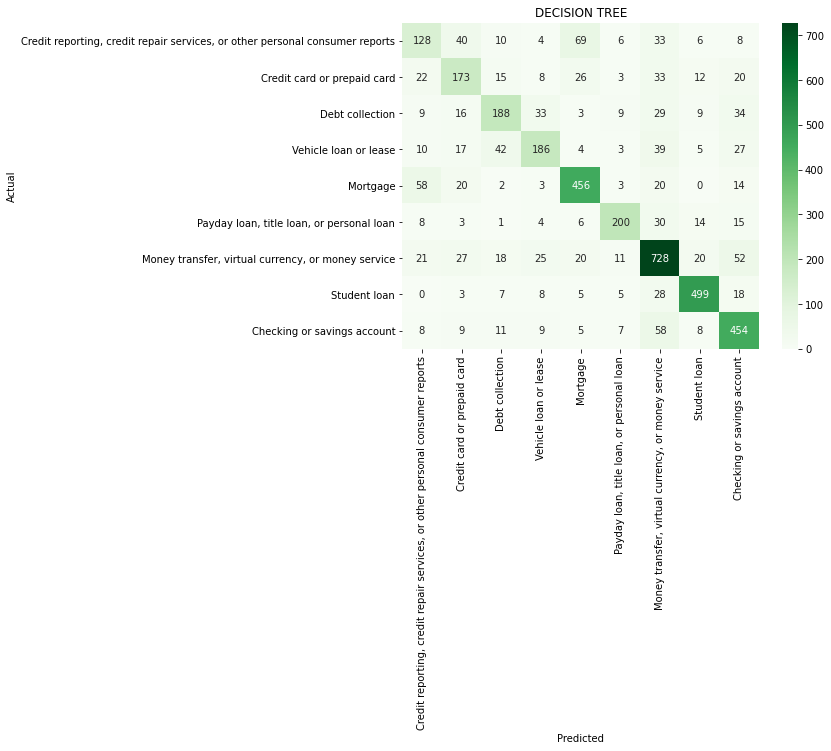

In [59]:
confu_mat = confusion_matrix(y_test, predictions_dectree)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('DECISION TREE')
plt.show()

In [60]:
metrics.accuracy_score(y_test,predictions_dectree)

0.7171428571428572

In [61]:
metrics.precision_score(y_test,predictions_dectree,average=None)

array([0.48484848, 0.56168831, 0.63945578, 0.66428571, 0.76767677,
       0.8097166 , 0.72945892, 0.87085515, 0.70716511])

In [62]:
metrics.recall_score(y_test,predictions_dectree,average=None)

array([0.42105263, 0.55448718, 0.56969697, 0.55855856, 0.79166667,
       0.71174377, 0.78958785, 0.87085515, 0.79789104])

In [63]:
metrics.f1_score(y_test,predictions_dectree,average=None)

array([0.45070423, 0.55806452, 0.6025641 , 0.60685155, 0.77948718,
       0.75757576, 0.75833333, 0.87085515, 0.74979356])

In [64]:
from sklearn.svm import LinearSVC

In [65]:
text_svm=Pipeline([('tfidf',TfidfVectorizer()),('classifier',LinearSVC())])

In [66]:
text_svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

In [67]:
predictions_svm=text_svm.predict(X_test)

In [68]:
print(confusion_matrix(y_test,predictions_svm))

[[207  17   0   5  47   2  18   1   7]
 [ 14 226   6   7  15   1  29   4  10]
 [  0  13 252  29   2   1   8  12  13]
 [  2  12  35 237   2   2  19   5  19]
 [ 32  12   0   0 516   0   9   2   5]
 [  1   0   3   4   7 242   9   4  11]
 [ 10   7   6   7   6   2 830  13  41]
 [  0   1   2   3   1   0  11 546   9]
 [  1   7   4   8   3   2  35   6 503]]


In [69]:
print(classification_report(y_test,predictions_svm))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.78      0.68      0.73       304
                                                 Credit card or prepaid card       0.77      0.72      0.74       312
Credit reporting, credit repair services, or other personal consumer reports       0.82      0.76      0.79       330
                                                             Debt collection       0.79      0.71      0.75       333
                          Money transfer, virtual currency, or money service       0.86      0.90      0.88       576
                                                                    Mortgage       0.96      0.86      0.91       281
                                   Payday loan, title loan, or personal loan       0.86      0.90      0.88       922
                                                       

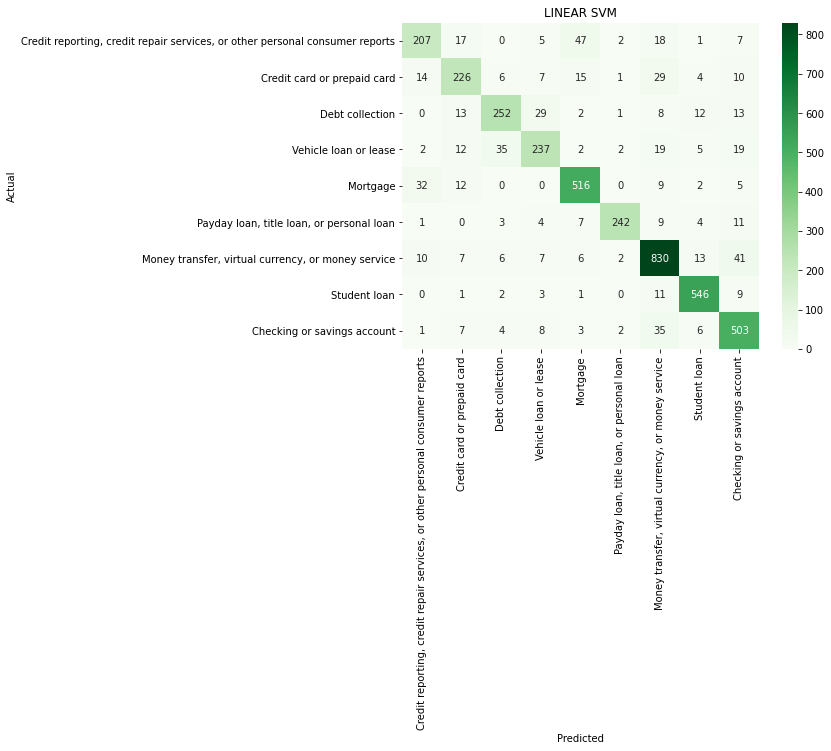

In [70]:
confu_mat = confusion_matrix(y_test, predictions_svm)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('LINEAR SVM')
plt.show()

In [71]:
metrics.accuracy_score(y_test,predictions_svm)

0.8473809523809523

In [72]:
metrics.precision_score(y_test,predictions_svm,average=None)

array([0.7752809 , 0.76610169, 0.81818182, 0.79      , 0.86143573,
       0.96031746, 0.85743802, 0.92074199, 0.81391586])

In [73]:
metrics.recall_score(y_test,predictions_svm,average=None)

array([0.68092105, 0.72435897, 0.76363636, 0.71171171, 0.89583333,
       0.86120996, 0.90021692, 0.95287958, 0.88400703])

In [74]:
metrics.f1_score(y_test,predictions_svm,average=None)

array([0.72504378, 0.7446458 , 0.78996865, 0.74881517, 0.87829787,
       0.90806754, 0.87830688, 0.93653516, 0.84751474])

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
text_logi=Pipeline([('tfidf',TfidfVectorizer()),('classifier',LogisticRegression(max_iter=10000,multi_class='ovr'))])

In [77]:
text_logi.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 LogisticRegression(max_iter=10000, multi_class='ovr'))])

In [78]:
predictions_logi=text_logi.predict(X_test)

In [79]:
print(confusion_matrix(y_test,predictions_logi))

[[187  15   0   1  67   2  27   0   5]
 [ 10 213   5   3  16   0  47   3  15]
 [  1  11 234  32   1   5  24   7  15]
 [  3   4  39 218   2   2  42   4  19]
 [ 29  11   0   2 503   0  25   0   6]
 [  1   0   2   1   4 223  33   5  12]
 [  9   8   6  13  16   3 799   9  59]
 [  0   1   1   4   3   0  27 524  13]
 [  2   0   2   9   4   2  88   3 459]]


In [80]:
print(classification_report(y_test,predictions_logi))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.77      0.62      0.68       304
                                                 Credit card or prepaid card       0.81      0.68      0.74       312
Credit reporting, credit repair services, or other personal consumer reports       0.81      0.71      0.76       330
                                                             Debt collection       0.77      0.65      0.71       333
                          Money transfer, virtual currency, or money service       0.82      0.87      0.84       576
                                                                    Mortgage       0.94      0.79      0.86       281
                                   Payday loan, title loan, or personal loan       0.72      0.87      0.79       922
                                                       

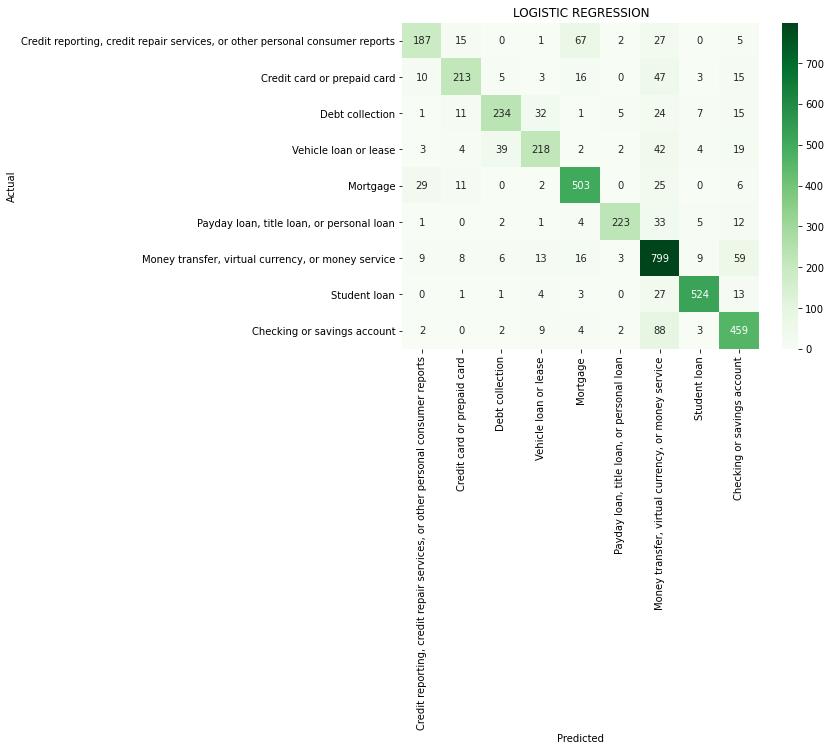

In [81]:
import seaborn as sns
confu_mat = confusion_matrix(y_test, predictions_logi)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('LOGISTIC REGRESSION')
plt.show()

In [82]:
metrics.accuracy_score(y_test,predictions_logi)

0.8

In [83]:
metrics.precision_score(y_test,predictions_logi,average=None)

array([0.77272727, 0.80988593, 0.80968858, 0.77031802, 0.81655844,
       0.94092827, 0.71852518, 0.94414414, 0.76119403])

In [84]:
metrics.recall_score(y_test,predictions_logi,average=None)

array([0.61513158, 0.68269231, 0.70909091, 0.65465465, 0.87326389,
       0.79359431, 0.86659436, 0.91448517, 0.80667838])

In [85]:
metrics.f1_score(y_test,predictions_logi,average=None)

array([0.68498168, 0.74086957, 0.75605816, 0.70779221, 0.84395973,
       0.86100386, 0.78564405, 0.92907801, 0.78327645])

In [86]:
#K NEAREST NEIGHBOURS
from sklearn.neighbors import KNeighborsClassifier

In [87]:
error_rate=[]
for i in range(1,36,2):
    text_knn=Pipeline([('tfidf',TfidfVectorizer()),('classifier',KNeighborsClassifier(n_neighbors=i))])
    text_knn.fit(X_train,y_train)
    pred_knn=text_knn.predict(X_test)
    error_rate.append(np.mean(pred_knn!=y_test))
    print(i)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35


Text(0, 0.5, 'Error rate')

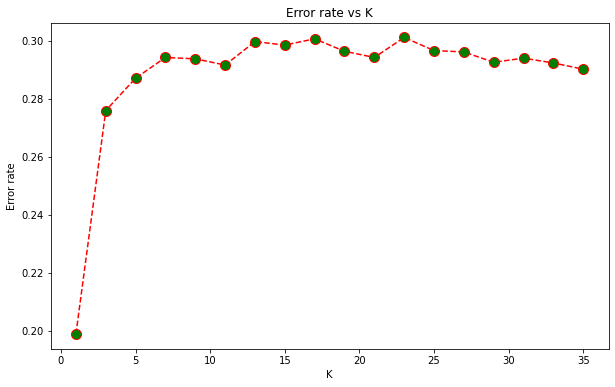

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(1,36,2),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

In [89]:
text_knn=Pipeline([('tfidf',TfidfVectorizer()),('classifier',KNeighborsClassifier(n_neighbors=11))])

In [90]:
text_knn.fit(X_train,y_train)
pred_knn=text_knn.predict(X_test)

In [91]:
metrics.accuracy_score(y_test,pred_knn)

0.7083333333333334

In [92]:
metrics.precision_score(y_test,pred_knn,average=None)

array([0.5       , 0.6035503 , 0.62990196, 0.6656051 , 0.79174147,
       0.80608365, 0.73137973, 0.80716724, 0.72811918])

In [93]:
metrics.recall_score(y_test,pred_knn,average=None)

array([0.62171053, 0.65384615, 0.77878788, 0.62762763, 0.765625  ,
       0.7544484 , 0.64967462, 0.82547993, 0.68717047])

In [94]:
metrics.f1_score(y_test,pred_knn,average=None)

array([0.5542522 , 0.62769231, 0.69647696, 0.64605873, 0.77846425,
       0.77941176, 0.68811028, 0.81622088, 0.70705244])

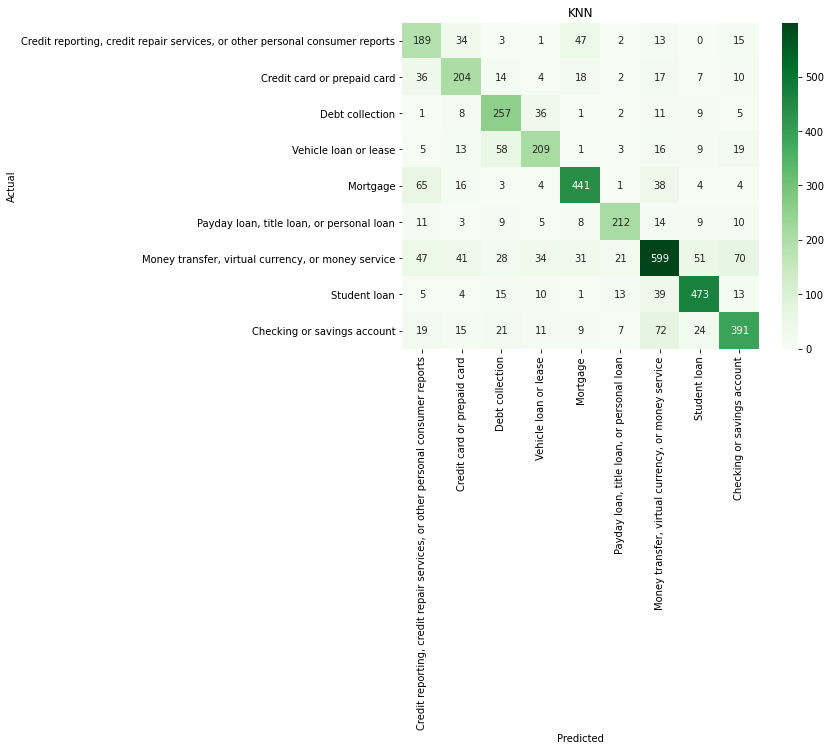

In [95]:
confu_mat = confusion_matrix(y_test, pred_knn)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('KNN')
plt.show()

In [96]:
print(classification_report(y_test,pred_knn))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.50      0.62      0.55       304
                                                 Credit card or prepaid card       0.60      0.65      0.63       312
Credit reporting, credit repair services, or other personal consumer reports       0.63      0.78      0.70       330
                                                             Debt collection       0.67      0.63      0.65       333
                          Money transfer, virtual currency, or money service       0.79      0.77      0.78       576
                                                                    Mortgage       0.81      0.75      0.78       281
                                   Payday loan, title loan, or personal loan       0.73      0.65      0.69       922
                                                       